## Advanced Pandas, Basic Python Viz and Exercise

### Exercise
1. Use the same dataframes you generated or copied to this directory from the 03 Exercise:
    1. Extract of any SQL database 
    1. Imported file from your capstone work
    1. Any other data from other exercises you have aleady used
1. Import into Pandas
1. Generate at least three additional dataframes with analytics introduced in this notebook
    1. Melt
    1. Pivot
    1. Quantile
    1. Aggregations
1. Build at least three  visualizations supported by Pandas directly using prior analytics from the 03 Exercise or new analytics from this exercise

In [ ]:
!pip install openpyxl

In [ ]:
import pandas as pd

## Get the data

### Read a CSV file from a website into a DataFrame

In [ ]:
url = 'https://data.cdc.gov/api/views/v6ab-adf5/rows.csv?accessType=DOWNLOAD'
mortality_data = pd.read_csv(url)

In [5]:
type(mortality_data)

pandas.core.frame.DataFrame

In [6]:
mortality_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 476 entries, 0 to 475
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Year        476 non-null    int64  
 1   Age Group   476 non-null    object 
 2   Death Rate  476 non-null    float64
dtypes: float64(1), int64(1), object(1)
memory usage: 11.3+ KB


<AxesSubplot:xlabel='Year'>

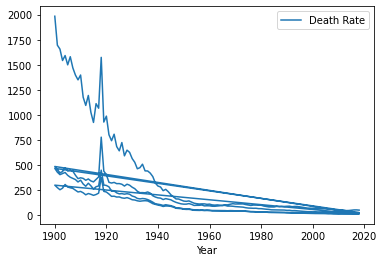

In [7]:
mortality_data.plot.line(x="Year", y = "Death Rate")

In [8]:
mortality_data

,Year,Age Group,Death Rate
0,1900,1-4 Years,1983.8
1,1901,1-4 Years,1695.0
2,1902,1-4 Years,1655.7
3,1903,1-4 Years,1542.1
4,1904,1-4 Years,1591.5
...,...,...,...
471,2014,15-19 Years,45.5
472,2015,15-19 Years,48.3
473,2016,15-19 Years,51.2
474,2017,15-19 Years,51.5


In [9]:
# SELECT [Age Group] , Year, COUNT(*) GROUP BY [Age Group], Year
mortality_data[['Age Group','Year']].value_counts()

Age Group    Year
1-4 Years    1900    1
15-19 Years  1975    1
             1987    1
             1986    1
             1985    1
                    ..
10-14 Years  1935    1
             1934    1
             1933    1
             1932    1
5-9 Years    2018    1
Length: 476, dtype: int64

### Save and restore a DataFrame

In [10]:
mortality_data.to_pickle('mortality_data.pkl')

In [11]:
mortality_data = pd.read_pickle('mortality_data.pkl')

In [12]:
mortality_data.head()

,Year,Age Group,Death Rate
0,1900,1-4 Years,1983.8
1,1901,1-4 Years,1695.0
2,1902,1-4 Years,1655.7
3,1903,1-4 Years,1542.1
4,1904,1-4 Years,1591.5


## Examine and clean the data

In [13]:
print("Index:  ", mortality_data.index)
print("Columns:", mortality_data.columns)
print("Size:   ", mortality_data.size)
print("Shape:  ", mortality_data.shape)

Index:   RangeIndex(start=0, stop=476, step=1)
Columns: Index(['Year', 'Age Group', 'Death Rate'], dtype='object')
Size:    1428
Shape:   (476, 3)


### Use the columns attribute to replace spaces with nothing


In [14]:
mortality_data.columns = mortality_data.columns.str.replace(' ', '')
mortality_data.columns

Index(['Year', 'AgeGroup', 'DeathRate'], dtype='object')

In [15]:
mortality_data.head()

,Year,AgeGroup,DeathRate
0,1900,1-4 Years,1983.8
1,1901,1-4 Years,1695.0
2,1902,1-4 Years,1655.7
3,1903,1-4 Years,1542.1
4,1904,1-4 Years,1591.5


In [17]:
mortality_data.describe().T

,count,mean,std,min,25%,50%,75%,max
Year,476.0,1959.00000,34.387268,1900.0,1929.000,1959.0,1989.000,2018.0
DeathRate,476.0,192.92416,293.224216,11.4,40.575,89.5,222.575,1983.8


In [18]:
mortality_data.describe(include="O").T

,count,unique,top,freq
AgeGroup,476,4,10-14 Years,119


In [19]:
len(mortality_data.DeathRate.value_counts())

430

In [34]:
import numpy as np
mortality_data['death_log']= np.log10(mortality_data['DeathRate'])

<AxesSubplot:>

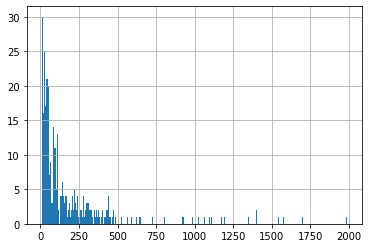

In [48]:
mortality_data.DeathRate.hist(bins=430)

<AxesSubplot:>

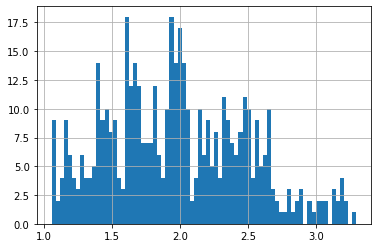

In [35]:
mortality_data.death_log.hist(bins=75)

In [ ]:
mortality_data.DeathRate.hist(bins=50)

In [ ]:
mortality_data.describe(include='O')

In [ ]:
mortality_data.describe().T

## Access the data

array([[<AxesSubplot:title={'center':'Year'}>,
        <AxesSubplot:title={'center':'DeathRate'}>]], dtype=object)

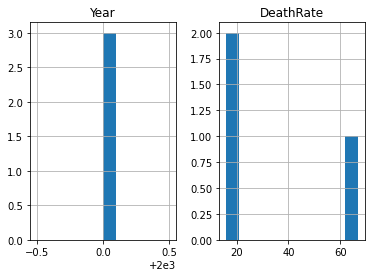

In [23]:
mortality_data.query("Year == 2000 and AgeGroup != '1-4 Years'").hist()

In [24]:
mortality_data.query('Year == 1900 or Year == 2000').head()

,Year,AgeGroup,DeathRate
0,1900,1-4 Years,1983.8
100,2000,1-4 Years,32.4
119,1900,5-9 Years,466.1
219,2000,5-9 Years,15.8
238,1900,10-14 Years,298.3


In [25]:
# use backticks if a column name contains spaces
mortality_data.query('Year == 2000 and `AgeGroup` != "1-4 Years"')

,Year,AgeGroup,DeathRate
219,2000,5-9 Years,15.8
338,2000,10-14 Years,20.3
457,2000,15-19 Years,67.1


### Access a subset of rows and columns

In [26]:
mortality_data.query('Year == 1900').DeathRate.head()

0      1983.8
119     466.1
238     298.3
357     484.8
Name: DeathRate, dtype: float64

In [27]:
mortality_data.query('Year == 1900')['DeathRate'].head()

0      1983.8
119     466.1
238     298.3
357     484.8
Name: DeathRate, dtype: float64

In [28]:
mortality_data.query('Year == 1900')[['AgeGroup','DeathRate']].head()

,AgeGroup,DeathRate
0,1-4 Years,1983.8
119,5-9 Years,466.1
238,10-14 Years,298.3
357,15-19 Years,484.8


### Apply statistical methods

In [44]:
#mean = sum of values / count of case/observation
md_mu = mortality_data.DeathRate.mean()

In [45]:
md_sigma = mortality_data.DeathRate.std()

In [46]:
#95% confidence interval is mean +/- 2 stdev
print ("deathrate is {} +/- {}".format(md_mu,2*md_sigma))

deathrate is 192.92415966386554 +/- 586.4484319208575


In [47]:
mortality_data['outlier'] = if mortality_data['DeathRate'] > md_mu + 2*md_sigma || mortality_data['DeathRate'] < md_mu - 2*md_sigma : True else: False 

SyntaxError: invalid syntax (<ipython-input-47-a5e3f20ed561>, line 1)

In [ ]:
# line you draw for equal number of cases on either side
mortality_data.DeathRate.median()

In [30]:
mortality_data[['AgeGroup','DeathRate']].max()

AgeGroup     5-9 Years
DeathRate       1983.8
dtype: object

In [31]:
mortality_data.count()

Year         476
AgeGroup     476
DeathRate    476
dtype: int64

In [32]:
[i/20 for i in range(0,20)]

[0.0,
 0.05,
 0.1,
 0.15,
 0.2,
 0.25,
 0.3,
 0.35,
 0.4,
 0.45,
 0.5,
 0.55,
 0.6,
 0.65,
 0.7,
 0.75,
 0.8,
 0.85,
 0.9,
 0.95]

In [33]:
mortality_data.quantile(0.5)

Year         1959.0
DeathRate      89.5
Name: 0.5, dtype: float64

In [36]:
#bins of 20 percentile cuts
mort_dist = mortality_data.quantile([i/20 for i in range(0,20)])
mort_dist["quantile"] = mort_dist.index
mort_dist


,Year,DeathRate,death_log,quantile
0.00,1900.00,11.400,1.056905,0.00
0.05,1905.75,15.050,1.177529,0.05
0.10,1911.50,21.500,1.332438,0.10
0.15,1917.25,26.350,1.420778,0.15
0.20,1923.00,31.800,1.502427,0.20
0.25,1929.00,40.575,1.608258,0.25
0.30,1935.00,45.050,1.653688,0.30
0.35,1941.00,51.275,1.709904,0.35
0.40,1947.00,63.800,1.804821,0.40
0.45,1953.00,80.050,1.903349,0.45


<AxesSubplot:xlabel='DeathRate'>

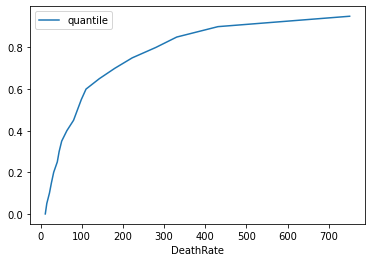

In [37]:
mort_dist.plot.line(y="quantile", x = "DeathRate")

<AxesSubplot:xlabel='death_log'>

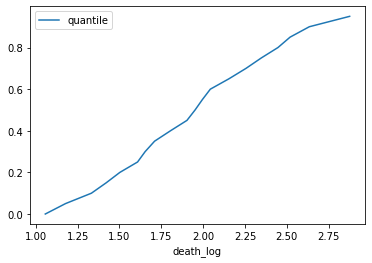

In [38]:
mort_dist.plot.line(y="quantile", x = "death_log")

In [39]:
# compare with SUM() OVER in SQL
mortality_data["CumDeathRate"] = mortality_data.DeathRate.cumsum()
mortality_data

,Year,AgeGroup,DeathRate,death_log,CumDeathRate
0,1900,1-4 Years,1983.8,3.297498,1983.8
1,1901,1-4 Years,1695.0,3.229170,3678.8
2,1902,1-4 Years,1655.7,3.218982,5334.5
3,1903,1-4 Years,1542.1,3.188113,6876.6
4,1904,1-4 Years,1591.5,3.201807,8468.1
...,...,...,...,...,...
471,2014,15-19 Years,45.5,1.658011,91631.7
472,2015,15-19 Years,48.3,1.683947,91680.0
473,2016,15-19 Years,51.2,1.709270,91731.2
474,2017,15-19 Years,51.5,1.711807,91782.7


<AxesSubplot:>

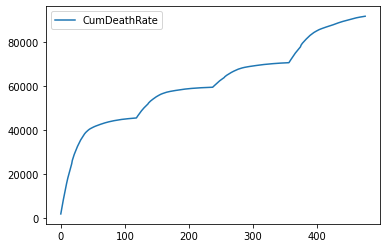

In [40]:
mortality_data.plot.line( y = "CumDeathRate")

### Use Python for column arithmetic

In [41]:
mortality_data['MeanCentered'] = \
    mortality_data.DeathRate - mortality_data.DeathRate.mean()

In [42]:
#mortality_data.head(4)
mortality_data.MeanCentered.describe()

count    4.760000e+02
mean     3.821406e-15
std      2.932242e+02
min     -1.815242e+02
25%     -1.523492e+02
50%     -1.034242e+02
75%      2.965084e+01
max      1.790876e+03
Name: MeanCentered, dtype: float64

In [49]:
mortality_data['DeathRate'] = mortality_data.DeathRate / 100000

In [50]:
mortality_data.head(4)

,Year,AgeGroup,DeathRate,death_log,CumDeathRate,MeanCentered
0,1900,1-4 Years,0.019838,3.297498,1983.8,1790.87584
1,1901,1-4 Years,0.016950,3.229170,3678.8,1502.07584
2,1902,1-4 Years,0.016557,3.218982,5334.5,1462.77584
3,1903,1-4 Years,0.015421,3.188113,6876.6,1349.17584


## Shape the data

### Set and use an index

In [ ]:
mortality_data = mortality_data.set_index('Year')
mortality_data.head(2)

In [ ]:
mortality_data.reset_index(inplace=True)

In [ ]:
# NOTE: the following line of code causes ValueError: Index has duplicate keys
# mortality_data = mortality_data.set_index('Year', verify_integrity=True)
mortality_data

In [ ]:
mortality_data = mortality_data.set_index(
    ['Year','AgeGroup'], verify_integrity=True)
mortality_data.head(2)

In [ ]:
mortality_data.reset_index(inplace=True)
mortality_data.head(2)

### Pivot the data

In [ ]:
mortality_wide = mortality_data.pivot(
    index='Year', columns='AgeGroup', values=['DeathRate','MeanCentered'])
mortality_wide.head(3)

In [ ]:
mortality_wide = mortality_data.pivot(
    index=['Year','MeanCentered'], columns='AgeGroup', values='DeathRate')
mortality_wide.head(3)    

In [ ]:
mortality_wide = mortality_data.pivot(
    index='Year', columns='AgeGroup')
mortality_wide.head(3)

### Melt the data

In [ ]:
mortality_wide = mortality_data.pivot(
    index='Year', columns='AgeGroup', values='DeathRate')
mortality_wide.head(3)

In [ ]:
# get starting data


# save to Excel format to remove indexes
mortality_wide.to_excel('mortality_wide.xlsx')
mortality_wide = pd.read_excel('mortality_wide.xlsx')

mortality_wide.head(4)

In [ ]:
mortality_long = mortality_wide.melt(
    id_vars = 'Year',
    value_vars=['1-4 Years','5-9 Years'],
    var_name ='AgeGroup',
    value_name='DeathRate')

with pd.option_context('display.max_rows', 4):
    display(mortality_long)

## Analyze the data

### Group the data

In [ ]:
mortality_data.groupby('AgeGroup').mean()

In [ ]:
mortality_data.groupby('AgeGroup').median()

In [ ]:
mortality_data.groupby('Year').median().head(4)

In [ ]:
mortality_data.groupby(['Year','AgeGroup']).count().head()

### Aggregate the data

In [ ]:
mortality_data[['AgeGroup','DeathRate']].groupby('AgeGroup').agg(['mean','median','min','max','std'])

In [ ]:
AgeGS = mortality_data.groupby("AgeGroup")
type(AgeGS)

In [ ]:
mortality_data.groupby('AgeGroup')['DeathRate'] \
    .agg(['mean','median','std','nunique'])

In [ ]:
mortality_data.groupby('Year')['DeathRate'] \
    .agg(['mean','median','std','min','max','var','nunique']).head(3)

In [ ]:
def fun_1q(foo): return foo.quantile(0.75)

fun_1q(mortality_data.DeathRate)

In [ ]:
fun_1q(mortality_wide[['1-4 Years']])

## Visualize the data

In [ ]:
mortality_data.pivot(index='Year',columns='AgeGroup')['DeathRate']

In [ ]:
mortality_data.pivot(index='Year',columns='AgeGroup')['DeathRate'].plot()

In [ ]:
mortality_data.pivot(index='Year',columns='AgeGroup')['DeathRate'].plot()

In [ ]:
mortality_data.pivot(index='Year',columns='AgeGroup')['DeathRate'].plot()

In [ ]:
mortality_data.groupby('AgeGroup')['DeathRate'] \
    .agg(['mean','median','std'])

In [ ]:
mortality_data.groupby('AgeGroup')['DeathRate'] \
    .agg(['mean','median','std']).plot.barh()

In [ ]:
mortality_data.groupby('AgeGroup')['DeathRate'] \
    .agg(['mean','median','std']).plot.bar()

In [ ]:
import seaborn as sns

In [ ]:
sns.relplot(data=mortality_data, 
            kind='line', x='Year', y='DeathRate', hue='AgeGroup', 
            height=4, aspect=1.25, 
            col='AgeGroup', col_wrap=2, legend=False)